In [211]:
from matplotlib import pyplot as plt
import numpy as np
import cv2

cv2.setRNGSeed(42)

In [265]:
original_image = cv2.imread("Lenna.png", cv2.IMREAD_COLOR)
rgb_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

In [284]:
def show_image(image):
    _, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
    ax1.imshow(rgb_image, cmap='gray')
    ax2.imshow(image, cmap='gray')
    

#### Оригинальное изображение

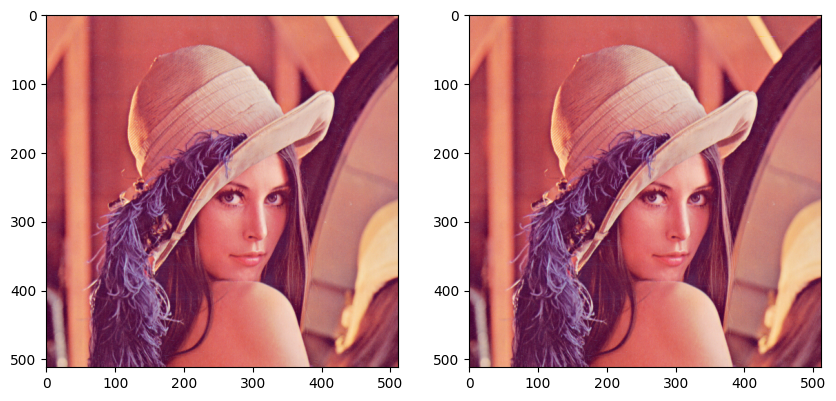

In [270]:
show_image(rgb_image)

#### ORB features

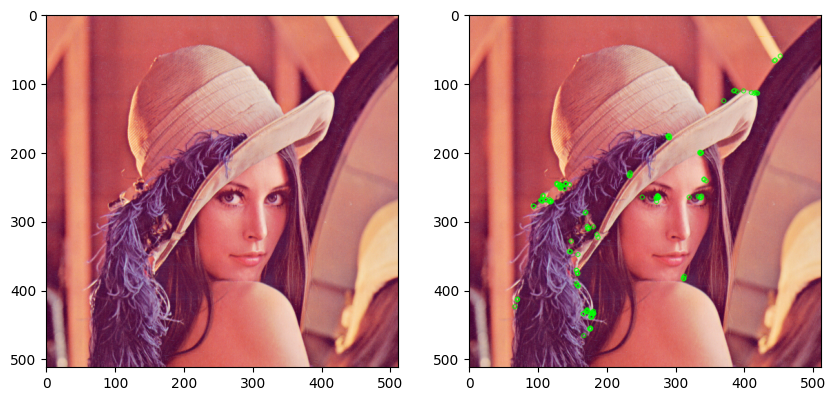

In [278]:
orb = cv2.ORB_create(nfeatures=140)
key_points = orb.detect(rgb_image, None)
image_with_key_points_orb = cv2.drawKeypoints(rgb_image, key_points, None, color=(0, 255, 0), flags=0)
show_image(image_with_key_points_orb)

#### SIFT features

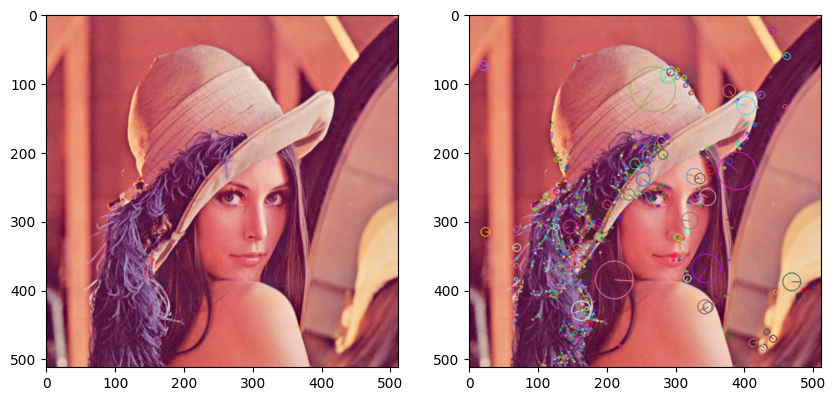

In [279]:
sift = cv2.SIFT_create(sigma=1., nfeatures=900) 
key_points = sift.detect(rgb_image, None)
image_with_key_points_sift = cv2.drawKeypoints(rgb_image, key_points, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
show_image(image_with_key_points_sift)

#### Canny edges

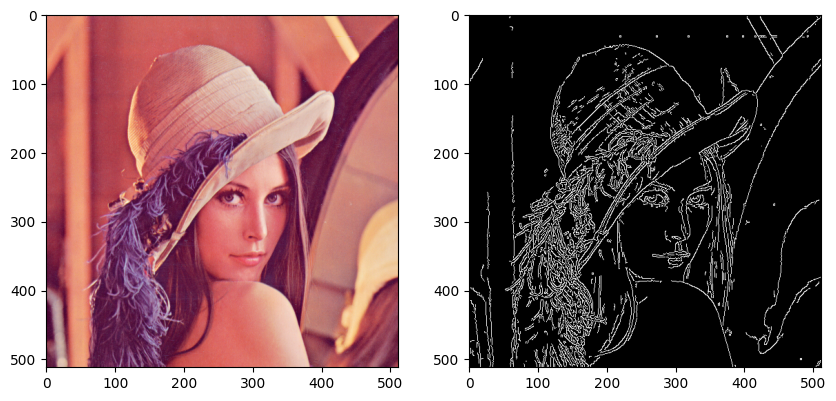

In [277]:
canny = cv2.Canny(rgb_image, 100, 160)
show_image(canny)

#### В grayscale

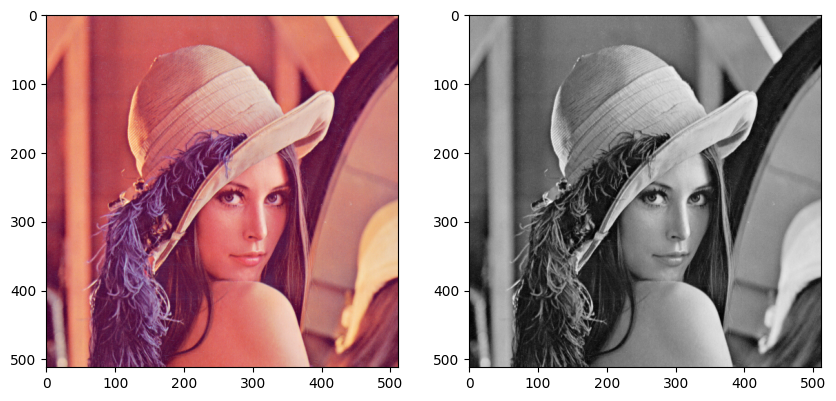

In [271]:
grayscaled = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2GRAY)
show_image(grayscaled)

#### В HSV

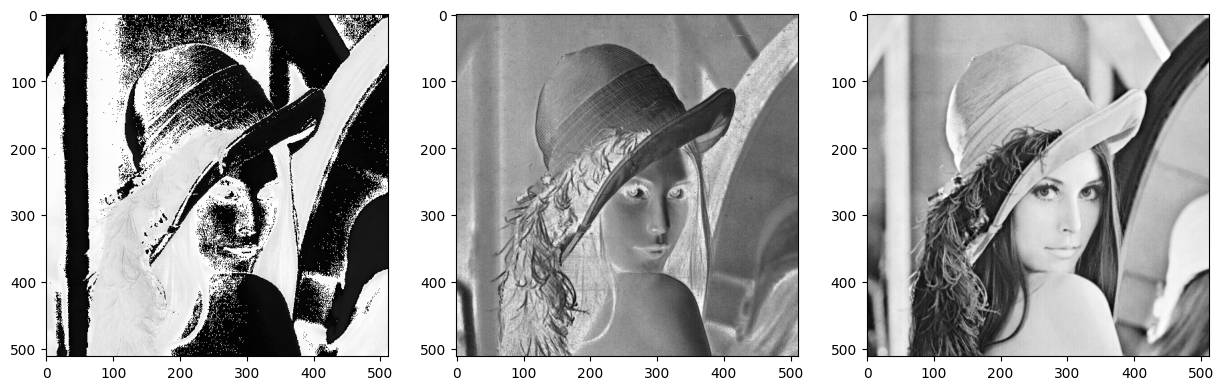

In [283]:
hsv_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2HSV)
h = hsv_image[:, :, 0]
s = hsv_image[:, :, 1]
v = hsv_image[:, :, 2]

_, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))

ax1.imshow(h, cmap='gray')
ax2.imshow(s, cmap='gray')
ax3.imshow(v, cmap='gray')
pass

#### Отраженное по правой границе

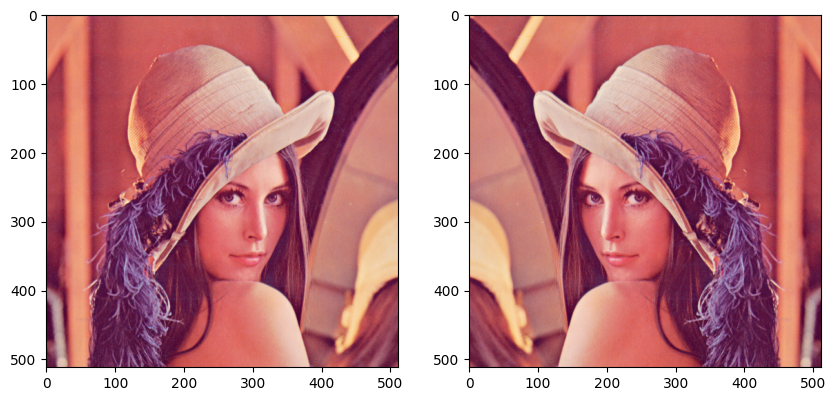

In [272]:
vert_flipped = cv2.flip(rgb_image, 1)
show_image(vert_flipped)

#### Отраженное по нижней границе

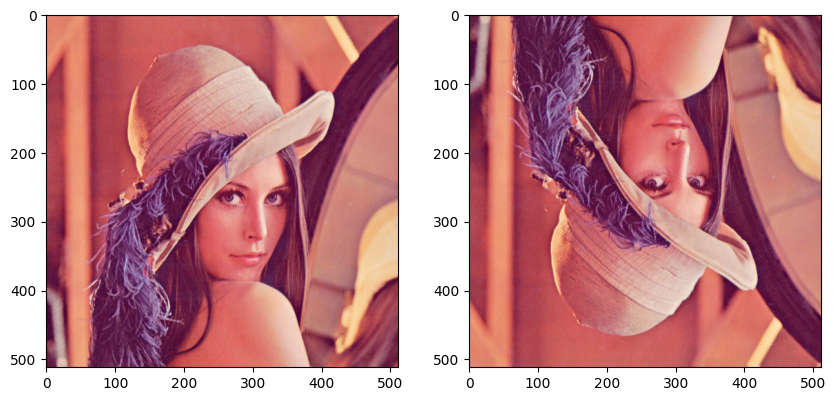

In [273]:
hor_flipped = cv2.flip(rgb_image, 0)
show_image(hor_flipped)

#### Повернутое на 45 градусов

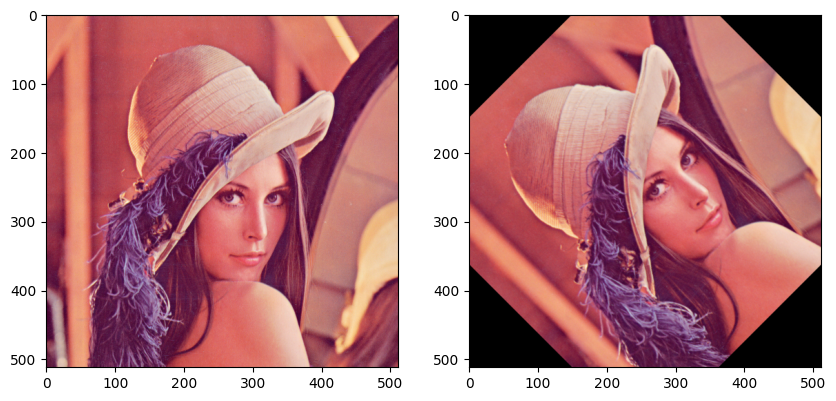

In [274]:
M = cv2.getRotationMatrix2D((256,256), 45, 1)
rotated45 = cv2.warpAffine(rgb_image, M, (512, 512))
show_image(rotated45)

#### Повернутое на 30 градусов относительно точки (0, 0)

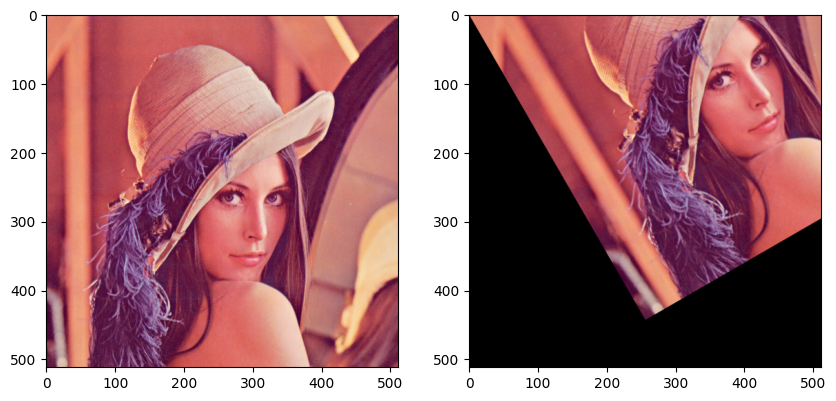

In [275]:
M = cv2.getRotationMatrix2D((0,0), 30, 1)
rotated30 = cv2.warpAffine(rgb_image, M, (512, 512))
show_image(rotated30)

#### Сдвинутое на 10 пикселей вправо

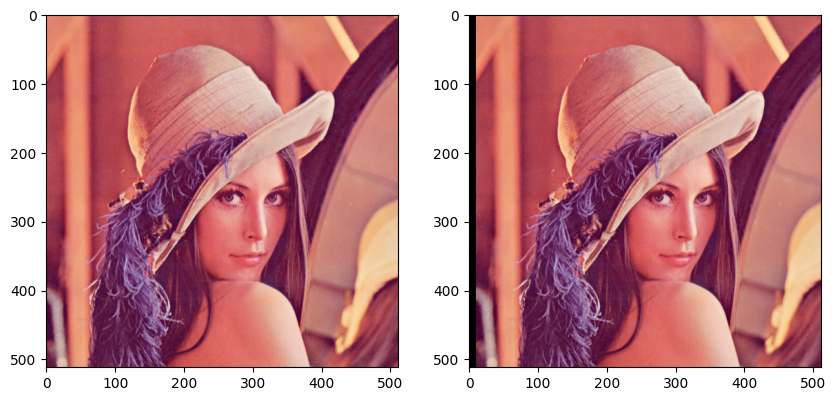

In [276]:
M = np.float32([[1, 0, 10], [0, 1, 0]])
shifted = cv2.warpAffine(rgb_image, M, (512, 512))
show_image(shifted)